In [12]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

Digit Data Loaded !
The loaded data has the shape(1797, 64)

Following is an example digit 8


<Figure size 432x288 with 0 Axes>

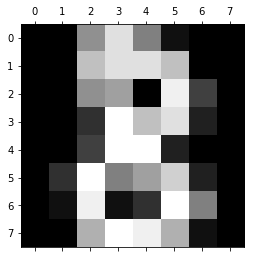

Selecting number of components for GMM using Bayesian Information Criteria(BIC)


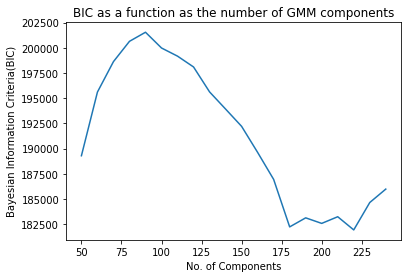

No. of components selected using 15 features: 220
GMM Converged: True


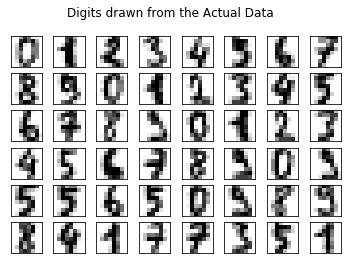

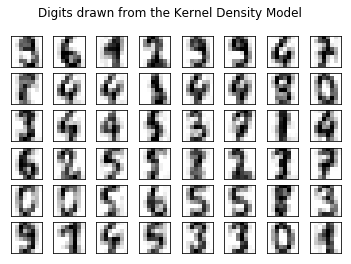

Selecting number of components for GMM using Bayesian Information Criteria(BIC)


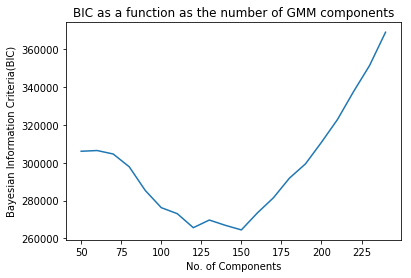

No. of components selected using 25 features: 150
GMM Converged: True


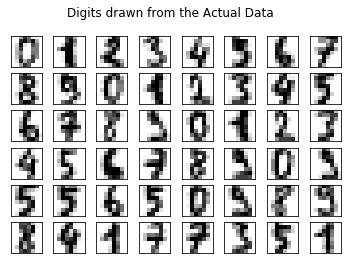

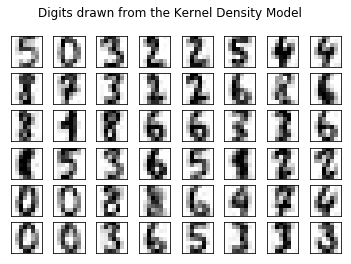

Selecting number of components for GMM using Bayesian Information Criteria(BIC)


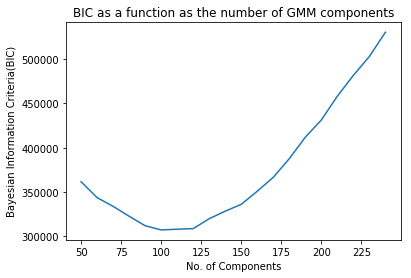

No. of components selected using 30 features: 100
GMM Converged: True


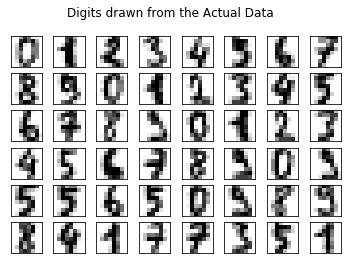

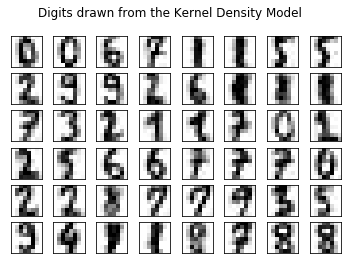

In [17]:
if __name__ == "__main__":
    
    digits = load_digits()
    X = digits.data
#     sc = StandardScaler()  
#     X = sc.fit_transform(X) 
    print('Digit Data Loaded !\nThe loaded data has the shape{}'.format(X.shape))
    print('\nFollowing is an example digit 8')
    plt.gray() 
    plt.matshow(digits.images[8]) 
    plt.show()
    
    n_features = [15,25,30]

    
    print('===============================================================================================')


    for i in range(len(n_features)):
        
        #-------------------------Reducing the number of dimentions using PCA---------------------
        pca = PCA(n_components=n_features[i], whiten=False)
        data = pca.fit_transform(digits.data)

        #-------------Performing Grid Search Cross-Validation to optimize the bandwidth-----------
        
        print('Selecting number of components for GMM using Bayesian Information Criteria(BIC)')
        n_components = np.arange(50, 250, 10)
        models = [GaussianMixture(n, covariance_type='full', random_state=0)
                  for n in n_components]
        bics = [model.fit(data).bic(data) for model in models]
        plt.plot(n_components, bics);
        plt.xlabel('No. of Components');
        plt.ylabel('Bayesian Information Criteria(BIC)');
        plt.title('BIC as a function as the number of GMM components')
        plt.show()
        index = np.argmin(bics)
        n_component = n_components[index]

        print('No. of components selected using {} features: {}'.format(n_features[i],n_component))

        #--------------------------Perform KDE using this best Bandwidth--------------------------
        gmm = GaussianMixture(n_component, covariance_type='full', random_state=0)
        gmm.fit(data)
        print('GMM Converged: {}'.format(gmm.converged_))

        # ---------------------Sample 48 new data points from estimated density-------------------
        new_data,labels = gmm.sample(48)
#         print(new_data.shape)
        new_data = pca.inverse_transform(new_data)

        # turn data into a 6x8 grid
        new_data = new_data.reshape((6, 8, -1))
        real_data = digits.data[:48].reshape((6, 8, -1))

        # plot real digits and resampled digits
        fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
        for j in range(8):
            for i in range(6):
                im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                                     cmap=plt.cm.binary, interpolation='nearest')
                im.set_clim(0, 16)
        fig.suptitle('Digits drawn from the Actual Data')
        plt.show()
                
        fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
        for j in range(8):
            for i in range(6):
                im = ax[i, j].imshow(new_data[i, j].reshape((8, 8)),
                                     cmap=plt.cm.binary, interpolation='nearest')
                im.set_clim(0, 16)
        fig.suptitle('Digits drawn from the Kernel Density Model')
        plt.show()
        
        print('===============================================================================================')

    